In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def region_growing(image, seed_points, threshold_range):
    mask = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    queue = deque(seed_points)
    for x, y in seed_points:
        mask[y, x] = 255
        visited[y, x] = True

    while queue:
        x, y = queue.popleft()
        current_value = image[y, x]

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue

                nx, ny = x + dx, y + dy
                if 0 <= nx < image.shape[1] and 0 <= ny < image.shape[0]:
                    if not visited[ny, nx]:
                        neighbor_value = image[ny, nx]
                        if abs(int(neighbor_value) - int(current_value)) <= threshold_range:
                            mask[ny, nx] = 255
                            visited[ny, nx] = True
                            queue.append((nx, ny))

    return mask


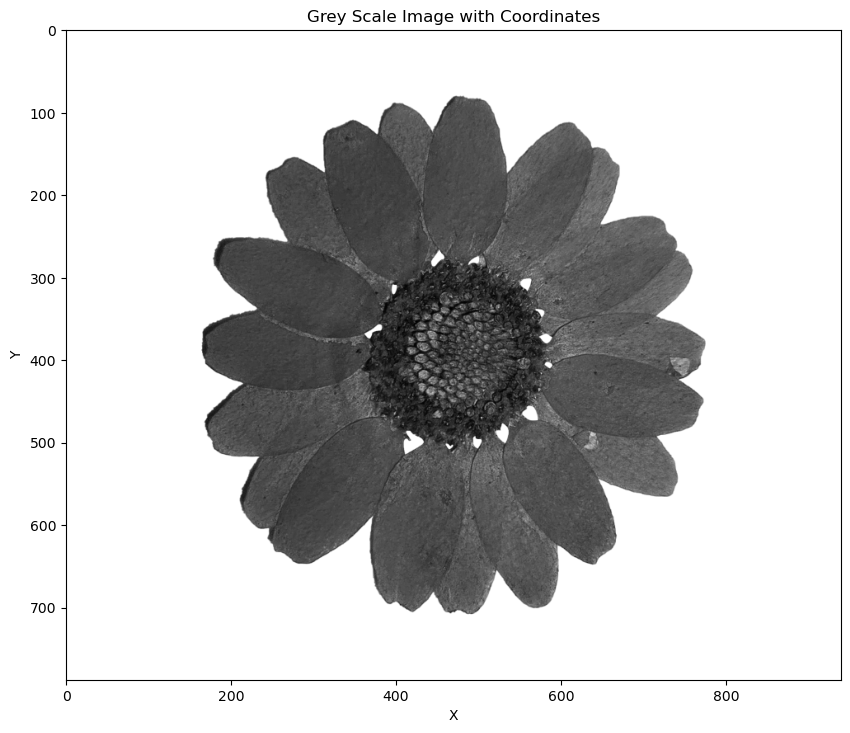

In [2]:
# Load grayscale image
image = cv2.imread('c.png', cv2.IMREAD_GRAYSCALE)

img = cv2.imread('c.png')
image_c = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.title('Grey Scale Image with Coordinates')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [3]:
# specify seed points after looking at the plot above
seed_points = [
    (450, 400),
    (250, 300),
]

# threshold
threshold_range = 20

print("Using seed points:", seed_points)


Using seed points: [(450, 400), (250, 300)]


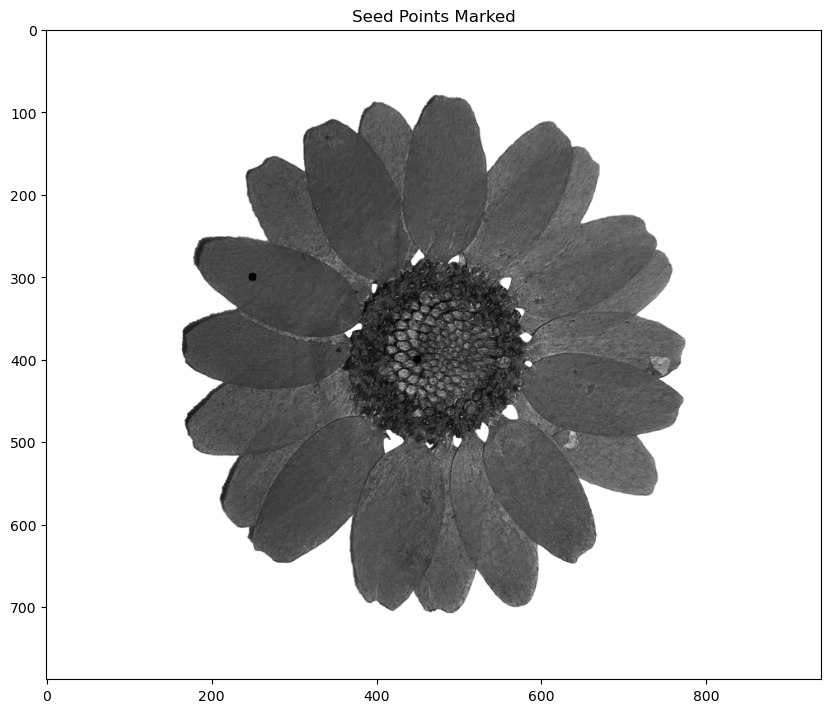

In [4]:
# show seeds drawn on the image
img_with_seeds = image.copy()
for (x, y) in seed_points:
    cv2.circle(img_with_seeds, (x, y), 5, 0, -1)

plt.figure(figsize=(10,10))
plt.imshow(img_with_seeds, cmap='gray')
plt.title('Seed Points Marked')
plt.show()


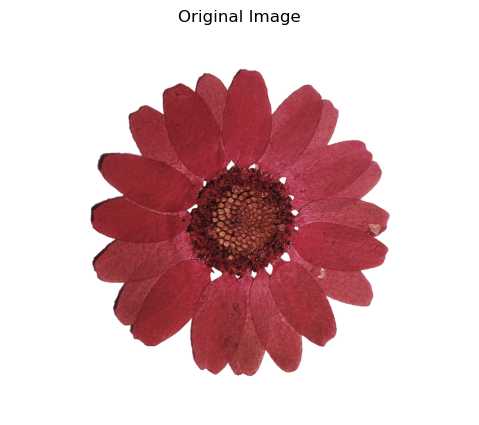

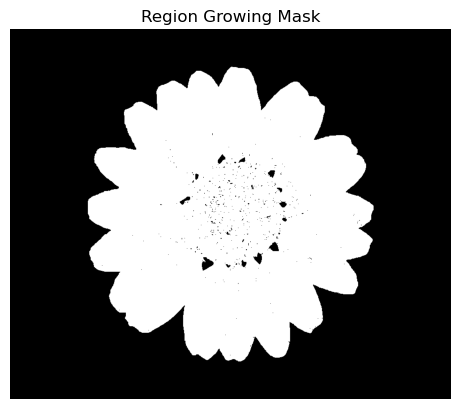

In [5]:
segmented_mask = region_growing(image, seed_points, threshold_range)

plt.figure(figsize=(15,5))

plt.title('Original Image')
plt.imshow(image_c)
plt.axis('off')
plt.show()

plt.title('Region Growing Mask')
plt.imshow(segmented_mask, cmap='gray')
plt.axis('off')
plt.show()
